In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle
RANDOM_STATE = 1234

np.random.seed(RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)

In [143]:
'''
from google.colab import drive
drive.mount('/content/drive')
'''

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [144]:
df = pd.read_csv('train.csv')
#df.head()

In [145]:
Y = df['label']
X = df.drop(['label'], axis=1)

X.head()
#Y.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [146]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y,train_size = 0.8,random_state= RANDOM_STATE)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,train_size = 0.2,random_state= RANDOM_STATE)

'''
print(x_train.shape),
print(x_test.shape),
print(y_train.shape),
print(y_test.shape),
'''

x_train = x_train.reset_index(drop=True)
x_val = x_val.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
x_train.head()



,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
y_train.head()

0    7
1    2
2    2
3    1
4    8
Name: label, dtype: int64

Normalisation and Reshaping

In [148]:
x_train /= 255.0
x_test /= 255.0
x_val /= 255.0
x_train = x_train.values.reshape(-1, 28, 28, 1)
x_val = x_val.values.reshape(-1, 28, 28, 1)
x_test = x_test.values.reshape(-1, 28, 28, 1)

In [149]:
datagen = ImageDataGenerator(
    rotation_range=5,         
    width_shift_range=0.05,   
    height_shift_range=0.05,  
    zoom_range=0.03,          
    shear_range=0.03,         
    fill_mode='nearest'       
)

In [150]:
datagen.fit(x_train, augment=True, seed=RANDOM_STATE)

Visualising


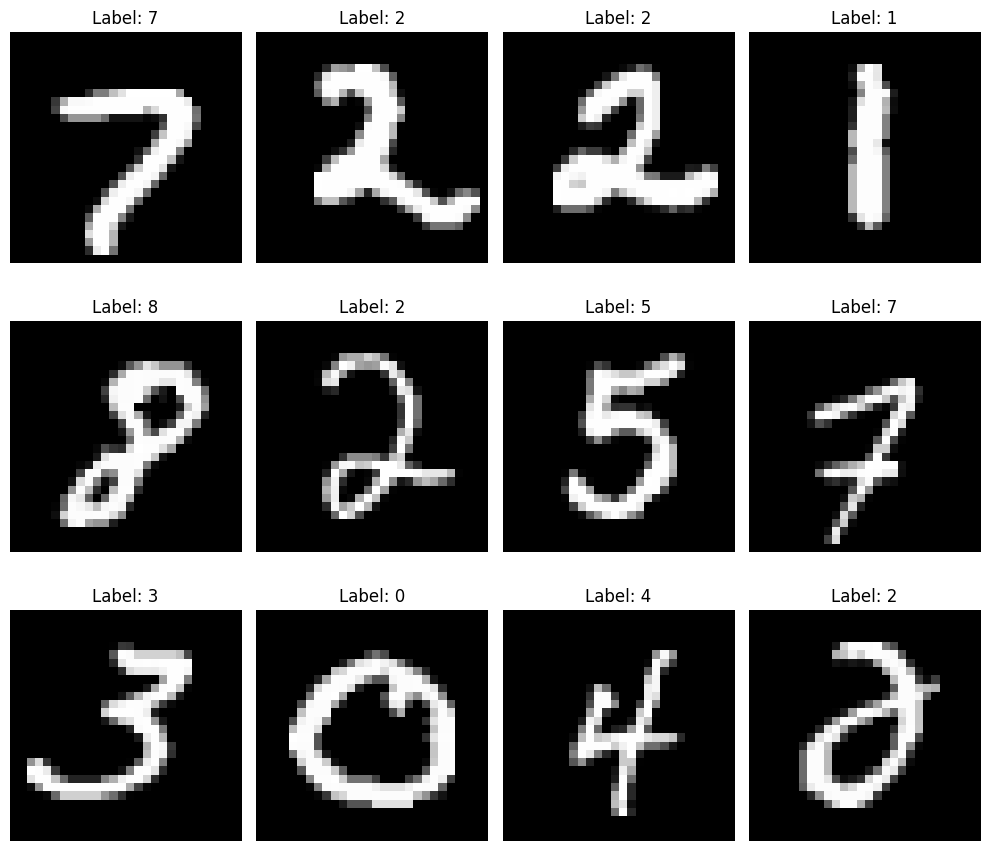

In [151]:
def plot(data, labels, title='Label'):
    plt.figure(figsize=(10, 9))
    for i in range(12):
        try:
            plt.subplot(3, 4, i + 1)
            plt.imshow(data[i][:, :, 0], cmap='gray')
            plt.title('{}: {}'.format(title, labels[i]))
            plt.axis('off')
        except KeyError as e:
            print(f"KeyError: {e} - at index {i}")
    plt.tight_layout()
    plt.show()

plot(x_train, y_train)

Defining the model

In [152]:
model = models.Sequential([
    layers.InputLayer(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='linear')
])

In [153]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [154]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer=tf.keras.optimizers.Adam(0.001),metrics=['acc'])

Fitting

In [155]:
history = model.fit(datagen.flow(x_train, y_train,batch_size=64,seed = RANDOM_STATE),validation_data=(x_val, y_val),epochs=60,verbose=2)
weights = model.get_weights()


Epoch 1/60


c:\Users\smsoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


105/105 - 3s - 31ms/step - acc: 0.7281 - loss: 0.8679 - val_acc: 0.9368 - val_loss: 0.2110
Epoch 2/60
105/105 - 2s - 24ms/step - acc: 0.9129 - loss: 0.2888 - val_acc: 0.9578 - val_loss: 0.1367
Epoch 3/60
105/105 - 2s - 23ms/step - acc: 0.9399 - loss: 0.1950 - val_acc: 0.9695 - val_loss: 0.1026
Epoch 4/60
105/105 - 2s - 23ms/step - acc: 0.9448 - loss: 0.1684 - val_acc: 0.9735 - val_loss: 0.0867
Epoch 5/60
105/105 - 2s - 23ms/step - acc: 0.9539 - loss: 0.1389 - val_acc: 0.9749 - val_loss: 0.0836
Epoch 6/60
105/105 - 2s - 23ms/step - acc: 0.9622 - loss: 0.1219 - val_acc: 0.9785 - val_loss: 0.0700
Epoch 7/60
105/105 - 2s - 23ms/step - acc: 0.9653 - loss: 0.1032 - val_acc: 0.9791 - val_loss: 0.0663
Epoch 8/60
105/105 - 2s - 23ms/step - acc: 0.9722 - loss: 0.0944 - val_acc: 0.9798 - val_loss: 0.0630
Epoch 9/60
105/105 - 2s - 23ms/step - acc: 0.9719 - loss: 0.0929 - val_acc: 0.9792 - val_loss: 0.0679
Epoch 10/60
105/105 - 2s - 23ms/step - acc: 0.9726 - loss: 0.0848 - val_acc: 0.9820 - val_los

In [156]:

with open('model_weights.pkl', 'wb') as f:
    pickle.dump(weights, f)

'''
STEPS TO USE SAVED WEIGHTS

import pickle

with open('model_weights.pkl', 'rb') as f:
    weights = pickle.load(f)

model.set_weights(weights)

'''

"\nSTEPS TO USE SAVED WEIGHTS\n\nimport pickle\n\nwith open('model_weights.pkl', 'rb') as f:\n    weights = pickle.load(f)\n\nmodel.set_weights(weights)\n\n"

Plots epochs vs loss, accuracy

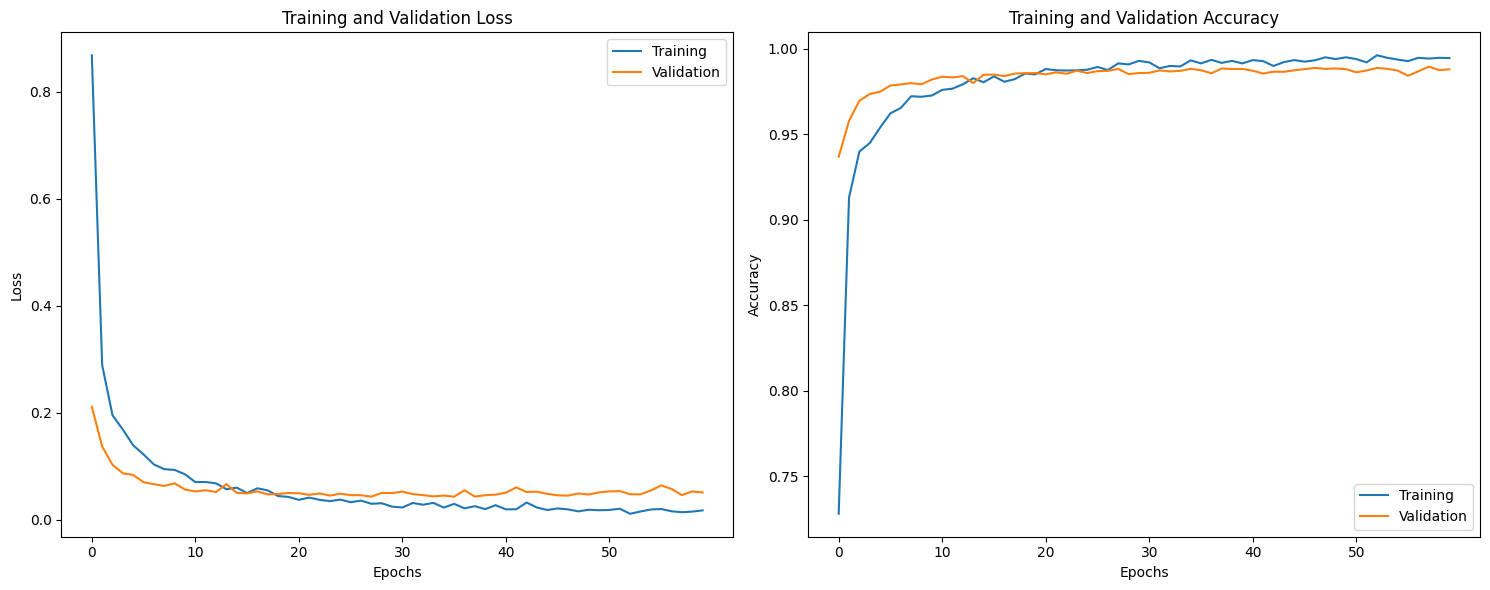

In [161]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(60)

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.title('Training and Validation Loss')
plt.plot(epochs, loss, label='Training')
plt.plot(epochs, val_loss, label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(range(0, len(epochs), 10))

plt.subplot(1, 2, 2)
plt.title('Training and Validation Accuracy')
plt.plot(epochs, acc, label='Training')
plt.plot(epochs, val_acc, label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(range(0, len(epochs), 10))

plt.tight_layout()
plt.show()

Evaluvate the MODEL

In [162]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9881 - loss: 0.0476
Test Loss: 0.04551944136619568
Test Accuracy: 0.9889285564422607


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


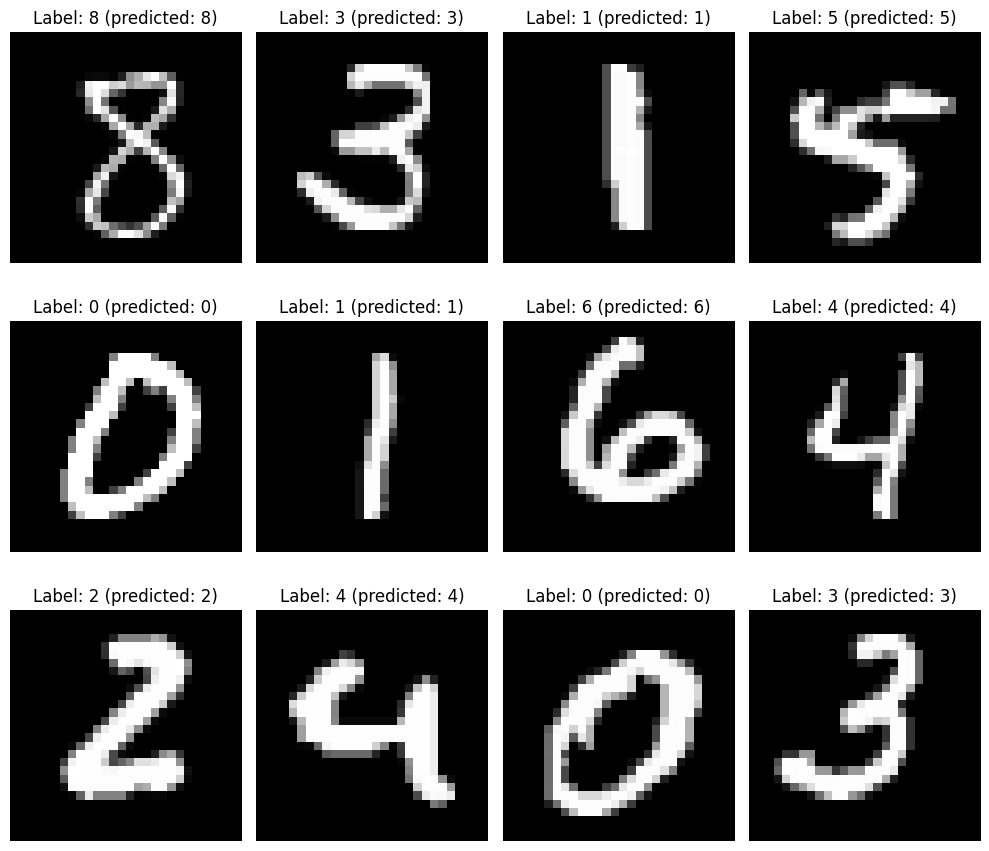

In [159]:
def plot(data, labels, model, title='Label'):
    plt.figure(figsize=(10, 9))
    for i in range(12):
        output = model.predict(data[i].reshape(1, 28, 28, 1))
        predicted_label = output.argmax()
        plt.subplot(3, 4, i + 1)
        plt.imshow(data[i][:, :, 0], cmap='gray')
        plt.title('{}: {} (predicted: {})'.format(title, labels[i], predicted_label))
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot(x_test, y_test, model)

Some wrongly predicted images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

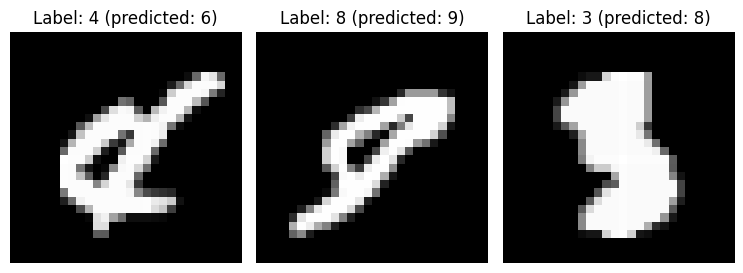

In [160]:
import matplotlib.pyplot as plt

def plot(data, labels, model, title='Label'):
    plt.figure(figsize=(10, 9))
    count = 0
    for i in range(len(data)):
        with plt.rc_context({'interactive': False}):
          output = model.predict(data[i].reshape(1, 28, 28, 1))
        predicted_label = output.argmax()

        if predicted_label != labels[i]:
            plt.subplot(3, 4, count + 1)
            plt.imshow(data[i][:, :, 0], cmap='gray')
            plt.title('{}: {} (predicted: {})'.format(title, labels[i], predicted_label))
            plt.axis('off')
            count += 1

        if count == 3:
            break

    plt.tight_layout()
    plt.show()


plot(x_test, y_test, model)